# Compare simulations with experiments

We compare back-calculated and experimental data.  We here plot the average discrepancy for all datasets. This notebook requires data generated in the notebook [SI4_BME](SI4_BME.ipynb)

In [1]:
import sys
sys.path.append('/home/sbottaro/Software/python_lib/BME/')
import bme_reweight as bme

lista2 = [ ["set_A","eNOE","eNOE_unidir","gn_eNOE"],\
        ["set_B","NOE","J3","RDC","CCRR"],\
        ["set_C","RDC1","RDC2"],\
        ["set_D","sPRE"]]






In [2]:
for i in range(len(lista2)):
    for j in range(1,len(lista2[i])):
        exp = "data/exp/%s/%s.exp.dat" % (lista2[i][0],lista2[i][j])
        calc = "data/exp/%s/%s.calc.dat" % (lista2[i][0],lista2[i][j])
        
        # now for PBD
        rew= bme.Reweight()
        calc = "data/calc/%s/2koc.%s.calc.dat" % (lista2[i][0],lista2[i][j])
        rew.load(exp,calc)
        before,after,neff = rew.optimize(theta=1000)
        chi = rew.weight_exp(exp,calc,"data/my_theta/%s/2koc_%s" % (lista2[i][0],lista2[i][j]))
        
        rew= bme.Reweight()
        calc = "data/calc/%s/6by5.%s.calc.dat" % (lista2[i][0],lista2[i][j])
        rew.load(exp,calc)
        before,after,neff = rew.optimize(theta=1000)
        chi = rew.weight_exp(exp,calc,"data/my_theta/%s/6by5_%s" % (lista2[i][0],lista2[i][j]))

# Warning: expt average        C8_H4';G10_H8=2.7098e-05 is larger than maximum value in simulation 1.0950e-05
# Warning: expt average         A4_H2;U11_H3=2.1664e-03 is larger than maximum value in simulation 1.9520e-03
# Warning: expt average         A4_H2;G12_H1=1.4964e-04 is larger than maximum value in simulation 5.0528e-05
# Warning: expt average       U11_H1';U11_H3=1.0555e-04 is smaller than minimum value in simulation 1.1313e-04
# Warning: expt average        U11_H3;U11_H5=2.2328e-04 is larger than maximum value in simulation 1.8584e-04
# Warning: expt average         C5_H5;G10_H1=7.7791e-05 is larger than maximum value in simulation 6.3488e-05
# Warning: expt average         C5_H6;G10_H1=3.4589e-05 is larger than maximum value in simulation 2.9324e-05
# Warning: expt average         G2_H1;C13_H5=8.3836e-05 is larger than maximum value in simulation 7.5302e-05
# Warning: expt average        G2_H1;C14_H1'=7.9748e-05 is larger than maximum value in simulation 7.1334e-05
# Warning

# Warning: expt average         G2_H1;C13_H6=7.9748e-05 is larger than maximum value in simulation 6.8599e-05
# Warning: expt average         C3_H5;G12_H1=9.7653e-05 is larger than maximum value in simulation 7.5908e-05
# Warning: expt average          U6_H6;G9_H1=3.4966e-05 is larger than maximum value in simulation 3.0278e-05
# Warning: expt average         G9_H1;G10_H8=5.8186e-05 is larger than maximum value in simulation 5.2770e-05
# Warning: expt average        U11_H3;U11_H6=1.7960e-04 is larger than maximum value in simulation 8.5314e-05
# Warning: expt average          C8_H5;G9_H1=4.7216e-05 is smaller than minimum value in simulation 4.9765e-05
# Warning: expt average         C5_H41;C5_H6=3.1401e-05 is smaller than minimum value in simulation 4.1907e-05
# Warning: expt average         C8_H42;C8_H5=7.1185e-03 is larger than maximum value in simulation 5.7733e-03
# Warning: expt average         C8_H5";G9_H1=3.1401e-05 is larger than maximum value in simulation 2.6894e-05
# Warnin

# Warning: expt average        C13_H5;C13_H6=5.3655e-03 is larger than maximum value in simulation 4.4166e-03
# Warning: expt average     C13_H1';C13_HO2'=1.8661e-03 is smaller than minimum value in simulation 1.8732e-03
# Warning: expt average      C14_H2';C14_H1'=3.5527e-03 is larger than maximum value in simulation 2.0592e-03
# Warning: expt average      C14_H1';C14_H3'=5.6302e-04 is larger than maximum value in simulation 3.3470e-04
# Warning: expt average      C14_H1';C14_H4'=1.2181e-03 is larger than maximum value in simulation 7.8567e-04
# Warning: expt average       C14_H41;C14_H5=4.7387e-03 is larger than maximum value in simulation 4.3099e-04
# Warning: expt average      C14_H41;C14_H42=2.5769e-02 is smaller than minimum value in simulation 3.4803e-02
# Warning: expt average       C14_H42;C14_H5=4.7501e-04 is smaller than minimum value in simulation 5.7572e-03
# Warning: expt average       C13_H2';C14_H6=8.3538e-03 is larger than maximum value in simulation 5.8220e-03
# Warni

# RDC scaling factors 6.0430e-03, 6.1257e-03


Now we collect all the data from the different ensembles

In [3]:
import numpy as np
import os
import subprocess
from scipy import stats


lowerb = ["C8_H5;G10_H1'","C8_H5;G10_H8","C8_H2';G10_H8","C8_H3';G9_H8",\
          "C8_H2';G9_H8","C8_H1';G10_H4'","C8_H2';G9_H2'"]


def calc_stuff(filename,rmsd=False):

    data_tmp = np.array([[float(x) for x in line.split()[1:]] for line in open(filename) if "#" not in line])
    labels = [line.split()[0] for line in open(filename) if "#" not in line] 
    if("NOE" in filename):
        
        bb = (data_tmp[:,4]-data_tmp[:,6])
        aa = (data_tmp[:,4]-data_tmp[:,7])
        if(rmsd == False):
            bb /= data_tmp[:,5]
            aa /= data_tmp[:,5]
        if("gn_eNOE" in filename):
            uu = np.array([-1 if(labels[i] in lowerb) else 1 for i in range(len(labels))])
            bb[np.where(bb*uu>0)] = 0.0
            aa[np.where(aa*uu>0)] = 0.0
    else:
        if("RDC" in filename or "sPRE" in filename):
            a1,b1,c1,d1,e1 = stats.linregress(data_tmp[:,0],data_tmp[:,2])
            a2,b2,c2,d2,e2 = stats.linregress(data_tmp[:,0],data_tmp[:,3])
            bb = (a1*data_tmp[:,0]+b1-data_tmp[:,2])
            aa = (a2*data_tmp[:,0]+b2-data_tmp[:,3])
            if(rmsd == False):
                bb /= data_tmp[:,1]
                aa /= data_tmp[:,1]
        else:
            bb = (data_tmp[:,0]-data_tmp[:,2])
            aa = (data_tmp[:,0]-data_tmp[:,3])
            if(rmsd == False):
                bb /= data_tmp[:,1]
                aa /= data_tmp[:,1]
    return bb,aa

ensembles = ["set_A","set_B","set_C","set_D","2koc","6by5"]
#thetas = [35,30,50,750]
thetas = [20,40,60,500]

#thetas = [35,30,35,250]
data = np.zeros((len(ensembles),len(lista2),4))

for o,ens in enumerate(ensembles):
    for i in range(len(lista2)):

        if("set" in ens):
            rmsd_before = []
            rmsd_after = []
            for k in range(4):
                diff_before = []
                diff_after = []
                for j in range(1,len(lista2[i])):    
                    ff = "data/my_theta/%s/rw_%s_%s_theta_%d_rep_%d.stats.dat" % (ens,lista2[i][0],lista2[i][j],thetas[o],k)
                    before, after = calc_stuff(ff)
                    diff_before.extend(before)
                    diff_after.extend(after)
                rmsd_before.append(np.average(np.array(diff_before)**2))    
                rmsd_after.append(np.average(np.array(diff_after)**2)) 

            data[o,i,0] = np.average(rmsd_before)
            data[o,i,1] = np.average(rmsd_after)
            data[o,i,2] = np.std(rmsd_before,ddof=1)/2
            data[o,i,3] = np.std(rmsd_after,ddof=1)/2            
        else:
            diff_before = []
            diff_after = []
            for j in range(1,len(lista2[i])): 
                ff = "data/my_theta/%s/%s_%s.stats.dat" % (lista2[i][0],ens,lista2[i][j])
                before, after = calc_stuff(ff)
                diff_before.extend(before)
                diff_after.extend(after)
            rmsd_before = np.average(np.array(diff_before)**2)  
            rmsd_after = np.average(np.array(diff_after)**2)  
            data[o,i,0] = rmsd_before
            data[o,i,1] = rmsd_after
            
#print(data)

And then make a barplot. Most of the commands below are cosmetics

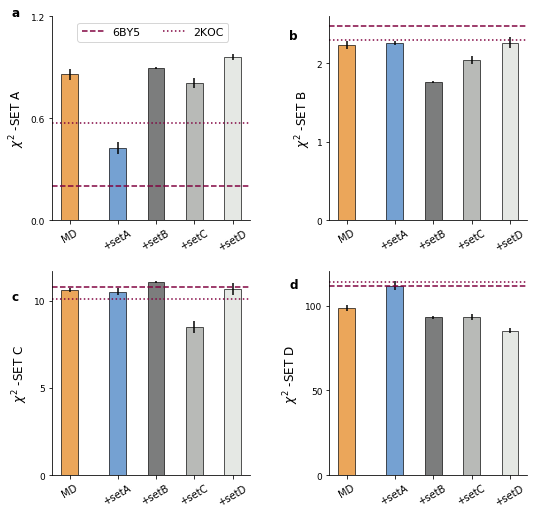

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
label_size = 9.0
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig, ax = plt.subplots(2,2,figsize=(7.5,7.5))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.98, top=0.95, wspace=0.4, hspace=0.25)
cols = ["black","medium blue","pumpkin","dusty purple","leaf green","wine","wine"]
cols = ["pumpkin","medium blue","dark grey","grey","light grey","wine","wine"]
cols1 = ["black","black","black","black","black"]
cp = sns.xkcd_palette(cols)
cps = sns.xkcd_palette(cols1)

wi=0.35
titles = ["SET A","SET B","SET C","SET D"]
#labs = ["MD","MD\n+setA","MD\n+setB","MD\n+setC","MD\n+setD","2KOC","6BY5"]
labs = ["MD","+setA","+setB","+setC","+setD","2KOC","6BY5"]
mm = [1.2,2.0,10,100]
xx = [0.2,1.2,2.0,2.8,3.6]
l=0
text = ["a","b","c","d"]
text_loc = [[-1.,1.2],[-1,2.3],[-1,10],[-1,110]]
for k in range(2):
    for i in range(2):

        yy = [data[0,l,0]] + list(data[:,l,1])
        err = [data[0,l,2]] + list(data[:,l,3])
        for m in range(len(labs)-2):
            #ax[k,i].bar(xx[m],yy[m],width=wi,color=cp[m],alpha=0.65,edgecolor=cps[m],yerr=err[m],label=labs[m])
            ax[k,i].bar(xx[m],yy[m],width=wi,color=cp[m],alpha=0.65,edgecolor=cps[m],yerr=err[m])
        ax[k,i].axhline(yy[-1],c=cp[-1],ls="--",label="6BY5")
        ax[k,i].axhline(yy[-2],c=cp[-2],ls=":",label="2KOC")
        ax[k,i].set_xticks(xx)
        #ax[k,i].set_xticklabels(labs,fontsize=9)
        ax[k,i].set_xticklabels(labs,fontsize=10,rotation=30)
        #ax[k,i].set_xlabel(titles[l],fontsize=10)
        ax[k,i].text(text_loc[l][0],text_loc[l][1],text[l],weight="bold",fontsize=12)
        yy = np.round(np.linspace(0,mm[l] ,3), 2)
        ax[k,i].set_yticks(yy)
        ax[k,i].spines['right'].set_visible(False)
        ax[k,i].spines['top'].set_visible(False)
        
        ax[k,i].set_ylabel("$\chi^2$ -%s" % titles[l],fontsize=12)

        if(k==0 and i==0):
            ax[k,i].legend(ncol=2,loc="lower left",bbox_to_anchor=(0.1,0.85),fontsize=11)

        l += 1

plt.savefig("figures/figure2.pdf")
plt.savefig("figures/figure2.png",dpi=500)
plt.show()
plt.close()
